<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Файл содержит 22 столбца и 23699 сторк.

В 14 столбцах указаны дробные числа, в 3 - целые, строки - в 3, булев тип данных - в 2. 14 столбцов содержат пропуски.


Количество этажей, расстояние до ближайшего аэропорта, расстояние до центра города, число парков, расстояние до ближайшего парка, число водоёмов, расстояние до ближайшего водоёма, количество дней размещения объявления, цену на момент снятия с публикации необходимо привести к целочисленному формату.


Также необходимо преобразовать графу "дата публикации" и обработать пропуски и дубликаты.

## Предобработка данных

Заролним пропуски в графе "Высота потолков" средним значением.

In [132]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Пропуски в графе "Жилая площадь" заменим на среднее значение в аналогичных квартирах. Аналогичными будем считать квартиры с таким же количеством комнат. Для этого используем фунции apply и lambda

In [133]:
data['living_area'] = data.groupby('rooms')['living_area'].apply(lambda s: s.fillna(s.mean()))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

С помощью аналогичных методов обработаем названия населенных пунктов, оставив только их наименования, удалив слова "поселок", "город" и т.д.

In [134]:
data['locality_name'].value_counts()

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Чудской Бор               1
посёлок Шугозеро                  1
посёлок Ропша                     1
посёлок Форт Красная Горка        1
деревня Курковицы                 1
Name: locality_name, Length: 364, dtype: int64

Поскольку слова "поселок", "город" и т.д. указаны прописными символами, используем функцию islower

In [135]:
data['locality_name'] = data.locality_name.fillna('').apply(
    lambda title: ' '.join(word for word in title.split(' ') if not word.islower())
)
data['locality_name'].value_counts()

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Кивеннапа Север        1
Мануйлово              1
Кирпичное              1
Трубников Бор          1
Русско                 1
Name: locality_name, Length: 306, dtype: int64

In [136]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Эти данные говорят о том, что колона "аппартаменты" заполнялась редко, заполнить пропуски теми или иными данными не представляется возможным.

Пропуски по количеству балконов заполним нулями, поскольку если человек не указал число балконов — скорее всего, их нет.

Заполним пропуски в графе "Площадь кухни" на 0

In [137]:
data['kitchen_area'] = data['kitchen_area'].fillna(0).astype('int64')


In [138]:
data['balcony'] = data['balcony'].fillna(0).astype('int64')
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Методом pd.to_datetime() переведем значения столбца first_day_exposition в таблице data в объекты datetime

In [139]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.round('1D')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,NaN,...,11,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,NaN,...,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,47.387941,9,NaN,...,0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [140]:
data['month'] = data['first_day_exposition'].dt.month 
data['year'] = data['first_day_exposition'].dt.year 
data['weekday'] = data['first_day_exposition'].dt.weekday

In [141]:
data['floors_total'] = data['floors_total'].fillna(0).astype('int64')

Сменим дробные значения на целочисленныетам, где это возможно.

In [142]:
data['last_price'] = data['last_price'].astype('int64', errors='ignore')
data['total_area'] = data['total_area'].astype('int64', errors='ignore')
#data['floors_total'] = data['floors_total'].astype('int64', errors='ignore')
data['living_area'] = data['living_area'].astype('int64', errors='ignore')
#data['balcony'] = data['balcony'].astype('int64', errors='ignore')
data['days_exposition'] = data['days_exposition'].astype('int64', errors='ignore')
data['airports_nearest'] = data['airports_nearest'].astype('int64', errors='ignore')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int64', errors='ignore')
data['parks_around3000'] = data['parks_around3000'].astype('int64', errors='ignore')
data['parks_nearest'] = data['parks_nearest'].astype('int64', errors='ignore')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64', errors='ignore')
data['ponds_nearest'] = data['ponds_nearest'].astype('int64', errors='ignore')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null int64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null int64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000   

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

Проверяем результат:

In [143]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,month,year,weekday
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3,2019,3
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,12,2018,1
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,8,2015,3
3,0,64900000,159,2015-07-24,3,2.65,14,47,9,NaN,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7,2015,4
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,6,2018,1


## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:
- цену квадратного метра

In [144]:
data['price_meter'] = (data['last_price'] / data['total_area']).astype('int64')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,month,year,weekday,price_meter
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,3,2019,3,120370
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,12,2018,1,83750
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,8,2015,3,92785
3,0,64900000,159,2015-07-24,3,2.65,14,47,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,7,2015,4,408176
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,6,2018,1,100000


- этаж квартиры; варианты — первый, последний, другой

In [145]:
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'first'
    if floor == floors_total:
        if floor !=1:
            return 'last'
    return 'other'

data['floor_group'] = data.apply(floor_group, axis=1)
data['floor_group'].value_counts()

other    17446
last      3336
first     2917
Name: floor_group, dtype: int64

- соотношение жилой и общей площади, а также отношение площади кухни к общей

In [146]:
data['living_ratio'] = data['living_area'] / data['total_area']
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,month,year,weekday,price_meter,floor_group,living_ratio,kitchen_ratio
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,...,2.0,755.0,NaN,3,2019,3,120370,other,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,NaN,...,0.0,NaN,81.0,12,2018,1,83750,first,0.450000,0.275000
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,NaN,...,2.0,574.0,558.0,8,2015,3,92785,other,0.607143,0.142857
3,0,64900000,159,2015-07-24,3,2.65,14,47,9,NaN,...,3.0,234.0,424.0,7,2015,4,408176,other,0.295597,0.000000
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,1.0,48.0,121.0,6,2018,1,100000,other,0.320000,0.410000


## Исследовательский анализ данных

Построим гистограммы для следующих параметров: площадь, цена, число комнат, высота потолков. 

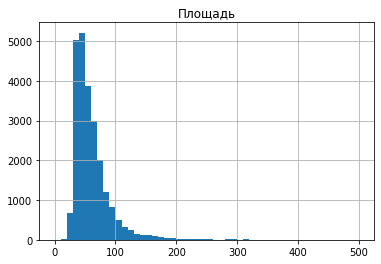

Средняя площадь: 52.0


In [147]:
# Площадь
data['total_area'].hist(bins=50, range = ( 0, 500))
plt.title('Площадь')
plt.show()
print('Средняя площадь:', data['total_area'].median())

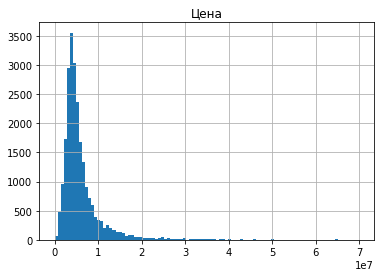

Средняя цена: 4650000.0


In [20]:
# Цена
data['last_price'].hist(bins=100, range = (0, 70000000))
plt.title('Цена')
plt.show()
print('Средняя цена:', data['last_price'].median())

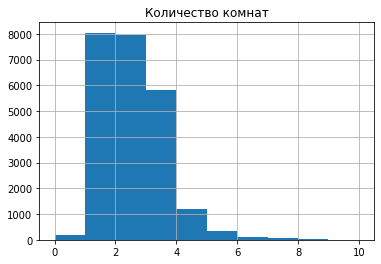

Среднее количество комнат: 2.0


In [21]:
# Комнаты
data['rooms'].hist(bins=10, range = ( 0, 10))
plt.title('Количество комнат')
plt.show()
print('Среднее количество комнат:', data['rooms'].median())

In [50]:
type(data['rooms'])

pandas.core.series.Series

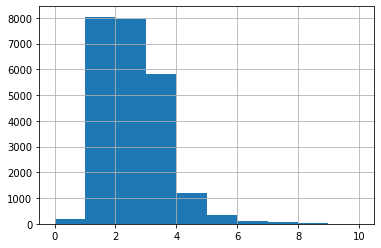

In [51]:
data['rooms'].hist(bins=10, range = ( 0, 10))

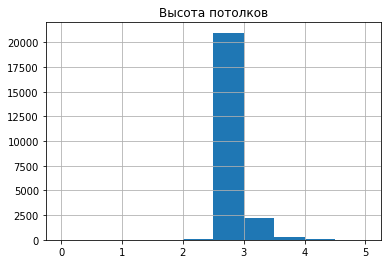

Средняя высота потолков: 2.65


In [22]:
# Высота потолков
data['ceiling_height'].hist(bins=10, range = ( 0, 5))
plt.title('Высота потолков')
plt.show()
print('Средняя высота потолков:', data['ceiling_height'].median())

Изучим время продажи квартиры. Построим гистограмму и посчитаем среднее и медиану

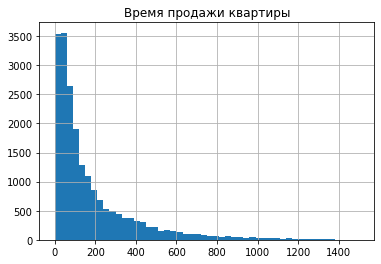

Среднее время продажи квартиры: 180
Медиана времени продажи квартиры: 95


In [23]:
data['days_exposition'].hist(bins=50, range = (0, 1500))
plt.title('Время продажи квартиры')
plt.show()
print('Среднее время продажи квартиры:', data['days_exposition'].mean().astype('int64'))
print('Медиана времени продажи квартиры:', data['days_exposition'].median().astype('int64'))

In [24]:
data.groupby('rooms').agg(
    {'days_exposition': ['count', 'median', 'min', 'max'], 'price_meter': ['count', 'median'], 'last_price': ['count', 'median']}
)

days_exposition                         price_meter            \
                count  median     min     max       count    median   
rooms                                                                 
0                 183    50.0     3.0   931.0         197  105555.0   
1                7273    81.0     2.0  1512.0        8047  100000.0   
2                6913    91.0     1.0  1580.0        7940   92796.0   
3                4819   114.0     3.0  1553.0        5814   88983.0   
4                 941   156.0     3.0  1512.0        1180   92666.0   
5                 252   185.5     4.0  1395.0         326   96516.5   
6                  76   201.5     8.0  1350.0         105   99411.0   
7                  37   138.0     9.0   781.0          59  108827.0   
8                  11   249.0     7.0   921.0          12  106760.0   
9                   4   469.5    90.0   825.0           8   92517.5   
10                  2    44.0    11.0    77.0           3   84372.0   
11                  1   813.0   813.0   813.0           2  132639.5   
12                  1   106.0   106.0   106.0           1  466666.0   
14                  2   256.5    95.0   418.0           2   92827.0   
15                  1    14.0    14.0    14.0           1  110169.0   
16                  1  1365.0  1365.0  1365.0           1  105555.0   
19                  1   114.0   114.0   114.0           1   86091.0   

      last_price               
           count       median  
rooms                          
0            197    2700000.0  
1           8047    3600000.0  
2           7940    4770169.0  
3           5814    6200000.0  
4           1180    9000000.0  
5            326   14000000.0  
6            105   19000000.0  
7             59   24900000.0  
8             12   23095000.0  
9              8   23750000.0  
10             3   23000000.0  
11             2   25250000.0  
12             1  420000000.0  
14             2   26829500.0  
15             1   65000000.0  
16             1   28500000.0  
19             1   32250000.0

Обычно продажа квартиры занимает 95 дней. Вместе с тем, время продажи зависит от количества комнат и стоимости жилья. Наиболее быстро продаются комнаты (0-комнатные квартиры в таблице). Элитное жилье (5 комнат и больше) продается от 200 дней и до нескольких лет, но такого жилья продается единицы и для этого правила есть исключения.

Можно считать, что продажи прошли очень быстро, если квартира продалась за неделю. Необычно долго продаются квартиры от 1 года до нескольких лет.


Найдем и уберем редкие и выбивающиеся значения:

AxesSubplot(0.125,0.125;0.775x0.755)
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


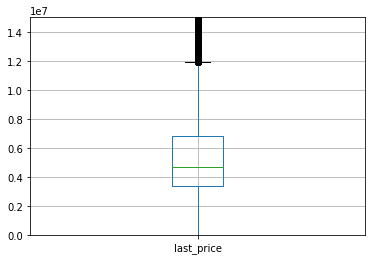

In [25]:
#import matplotlib.pyplot as plt

plt.ylim(0, 15000000)

    print(data.boxplot(column='last_price'))
print(data['last_price'].describe())

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


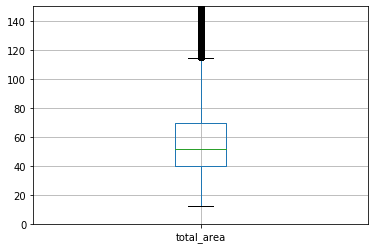

In [26]:
plt.ylim(0, 150)

data.boxplot(column='total_area')
print(data['total_area'].describe())

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


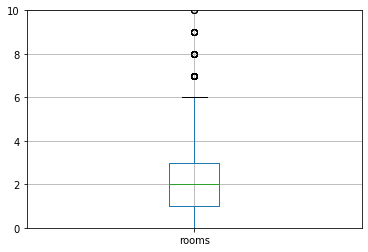

In [27]:
plt.ylim(0, 10)

data.boxplot(column='rooms')
print(data['rooms'].describe())

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

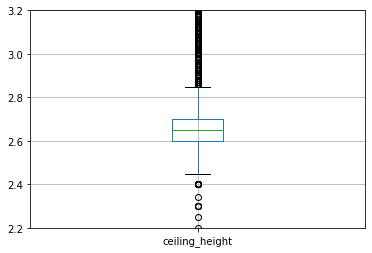

In [28]:
plt.ylim(2.2, 3.2)

data.boxplot(column='ceiling_height')
display(data['ceiling_height'].describe())

Из диаграм видим следующие особенности:
- стоимость жилья более 12000000 является редкой,
- площадь жилья более 110 кв. м. также встречается очень редко,
- не типичными являются квартиры с количеством комнат более 6,
- высота потолков менее 2,4 и более 2,9 является редкостью.

Чтобы убрать редкие и выбивающиеся значения создадим с помощью метода query новый dataframe и уберем значения, находящиеся за пределами "усов" на диаграммах размаха

In [29]:
data_filtered = data.query('last_price < 12000000 and total_area < 110 and rooms < 6 and 2.4 < ceiling_height < 2.9')
data_filtered

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,month,year,weekday,price_meter,floor_group,living_ratio,kitchen_ratio
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,NaN,...,0.0,NaN,81.0,12,2018,1,82920,first,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,NaN,...,2.0,574.0,558.0,8,2015,3,92785,other,0.612500,0.142857
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.400000,5,NaN,...,NaN,NaN,55.0,9,2018,0,95065,other,0.473684,0.296053
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.600000,6,NaN,...,0.0,NaN,155.0,11,2017,3,99195,other,0.284182,0.375335
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,31.736849,22,NaN,...,0.0,NaN,NaN,4,2019,3,110544,other,0.443252,0.251397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.0,2017-07-07,1,2.65,5,17.500000,4,NaN,...,NaN,NaN,413.0,7,2017,4,45000,other,0.583333,0.200000
23693,9,4600000.0,62.4,2016-08-05,3,2.60,9,40.000000,8,NaN,...,1.0,675.0,239.0,8,2016,4,73717,other,0.641026,0.128205
23695,14,3100000.0,59.0,2018-01-15,3,2.65,5,38.000000,4,NaN,...,NaN,NaN,45.0,1,2018,0,52542,other,0.644068,0.135593
23696,18,2500000.0,56.7,2018-02-11,2,2.65,3,29.700000,1,NaN,...,NaN,NaN,NaN,2,2018,6,44091,first,0.523810,0.000000


Таким образом, мы убрали всего (23699 - 19546 =) 4153 строк с редкими значениями

Посмотрим, зависит ли цена от площади, числа комнат, удалённости от центра.

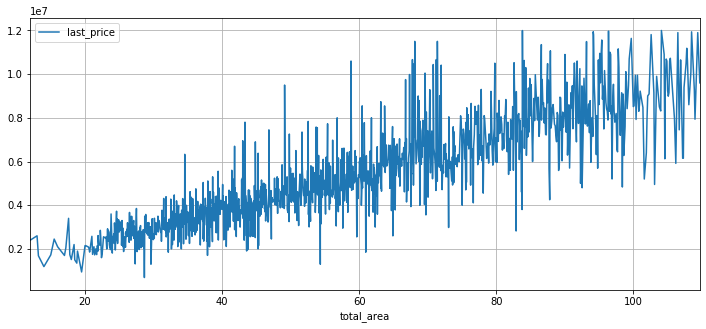

In [30]:
(
    data_filtered
    .pivot_table(index='total_area', values='last_price')
    .plot(grid=True, figsize=(12, 5))
)

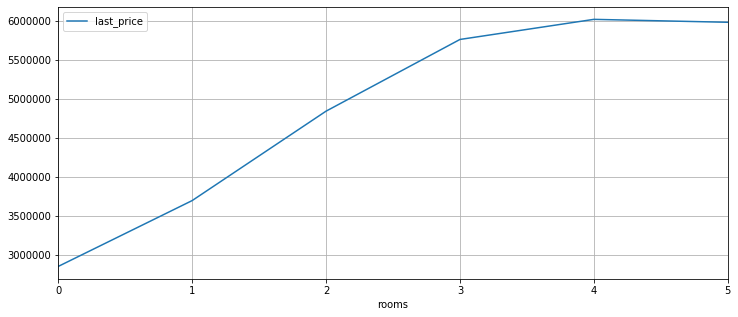

In [31]:
(
    data_filtered
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True, figsize=(12, 5))
)

-0.3061570822232006

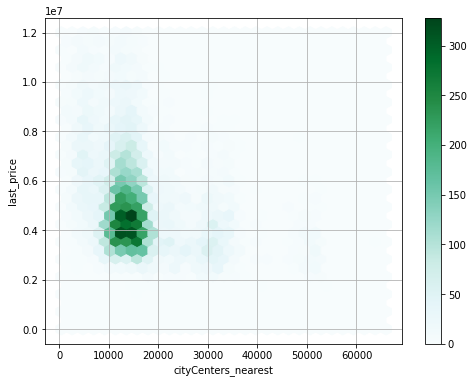

In [32]:
data_filtered.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=30, figsize=(8, 6), sharex=False, grid=True) 
display(data_filtered['last_price'].corr(data_filtered['cityCenters_nearest']))

Из графиков видно, что цена напрямую зависит от площади и количества комнат. А с увеличением расстояния от центра, напротив,  цена падает, то есть зависимость этих показателей обратная.

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

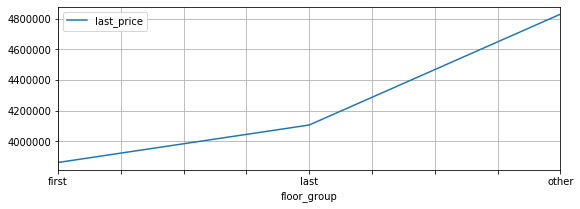

In [33]:
(
    data_filtered
    .pivot_table(index='floor_group', values='last_price')
    .plot(grid=True, figsize=(9, 3))
)

Первый и последний этаж считаются менее ликвидными - это и отражает график.

Посчитаем зависимость цены от даты размещения: дня недели, месяца и года.

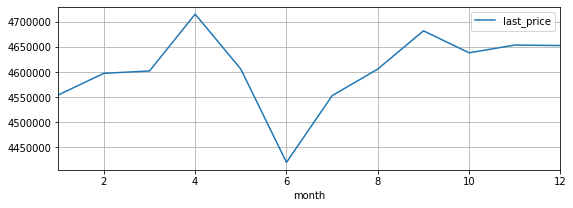

In [34]:
(
    data_filtered
    .pivot_table(index='month', values='last_price')
    .plot(grid=True, figsize=(9, 3))
)

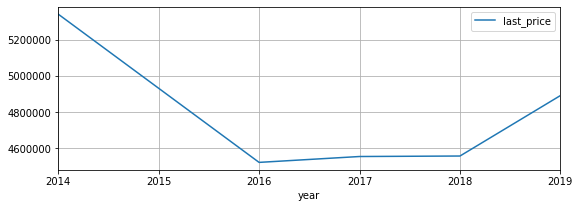

In [35]:
(
    data_filtered
    .pivot_table(index='year', values='last_price')
    .plot(grid=True, figsize=(9, 3))
)

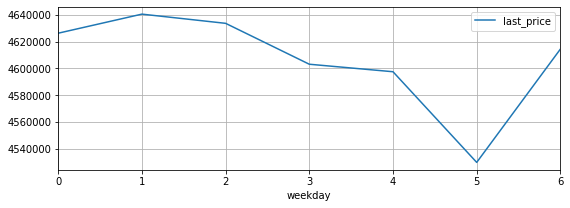

In [36]:
(
    data_filtered
    .pivot_table(index='weekday', values='last_price')
    .plot(grid=True, figsize=(9, 3))
)

На времени размещения объявлений сказывается сезонность продаж недвижимости - активность продаж падает летом в период отрусков. Уменьшение количества объявлений также видо в выходные, что обусловлено тем, что в выходные большинство риелторских агенств не работает. Что касается распределения предложений по годам, то из графика видно падения их количества после кризиса конца 2014 -  начала 2015, связанного с введением санкций в отношении России, падения курса рубля и, как следствие, снижением деловой активности. Количество предложений стало восстанавливаться лишь в 2018-2019 с восстановлением экономики.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 

In [37]:
data_filtered.groupby('locality_name').agg({'price_meter': ['count', 'mean']}).sort_values(by=('price_meter', 'count'), ascending=False).head(10)

price_meter               
                      count           mean
locality_name                             
Санкт-Петербург       12069  104821.824509
Мурино                  583   86078.447684
Кудрово                 466   95192.122318
Шушары                  431   78716.888631
Всеволожск              380   67109.531579
Парголово               325   90416.778462
Колпино                 315   75407.168254
Пушкин                  300   99697.276667
Гатчина                 283   68340.402827
Выборг                  205   57680.029268

Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [38]:
display(data_filtered.groupby('locality_name').agg({'price_meter': ['count', 'mean']}).sort_values(by=('price_meter', 'mean'), ascending=False).head())
display(data_filtered.groupby('locality_name').agg({'price_meter': ['count', 'mean']}).sort_values(by=('price_meter', 'mean'), ascending=True).head())

price_meter               
                      count           mean
locality_name                             
Лисий Нос                 2  113728.000000
Санкт-Петербург       12069  104821.824509
Сестрорецк              143  100878.244755
Зеленогорск              20  100123.450000
Пушкин                  300   99697.276667

price_meter         
                    count     mean
locality_name                     
Старополье              3  11206.0
Свирь                   2  11481.0
Вахнова Кара            1  11688.0
Выскатка                2  12335.0
Совхозный               2  12628.5

Выделим квартиры в Санкт-Петербурге. Выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

In [39]:
data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).fillna(-1).astype('int64')

In [40]:
data.groupby('cityCenters_km').agg({'price_meter': ['count', 'median']}).sort_values(by='cityCenters_km')

price_meter          
                     count    median
cityCenters_km                      
-1                    5519   60493.0
 0                      86  138536.5
 1                     242  123966.0
 2                     307  116363.0
 3                     530  110079.5
...                    ...       ...
 60                      1   56250.0
 61                      1   60606.0
 62                      2   65807.0
 64                      1   67843.0
 65                      4   73504.0

[62 rows x 2 columns]

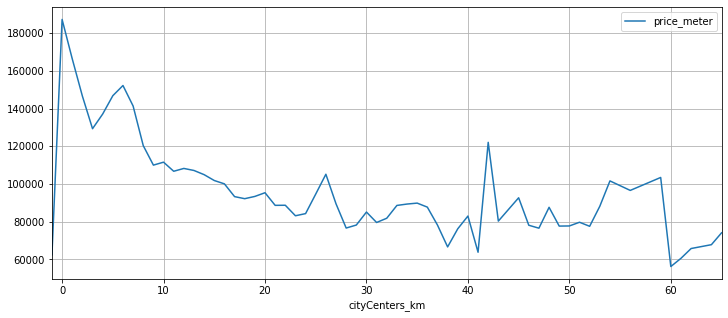

In [41]:
(
    data
    .pivot_table(index='cityCenters_km', values='price_meter')
    .plot(grid=True, figsize=(12, 5))
)

Граница, где график сильно меняется, — 3 км. Это и будет центральная зона. 

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [42]:
data_center = data.query('0 <= cityCenters_km <= 3')
data_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,month,year,weekday,price_meter,floor_group,living_ratio,kitchen_ratio,cityCenters_km
24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.500000,1,NaN,...,124.0,265.0,10,2015,5,66872,first,0.478395,0.195473,2
35,6,15500000.0,149.0,2017-06-26,5,2.65,5,104.000000,4,NaN,...,779.0,644.0,6,2017,0,104026,other,0.697987,0.114094,3
99,32,9600000.0,90.0,2017-09-26,4,2.65,5,67.000000,2,NaN,...,NaN,104.0,9,2017,1,106666,other,0.744444,0.088889,2
136,16,6500000.0,51.8,2018-08-01,2,3.45,6,25.600000,2,NaN,...,812.0,163.0,8,2018,2,125482,other,0.494208,0.135135,3
138,8,4800000.0,40.0,2017-11-18,2,2.65,3,29.000000,2,NaN,...,729.0,80.0,11,2017,5,120000,other,0.725000,0.150000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23521,13,8500000.0,65.0,2018-11-01,2,2.65,4,44.000000,2,NaN,...,NaN,NaN,11,2018,3,130769,other,0.676923,0.230769,3
23555,5,15350000.0,158.5,2019-03-07,7,2.95,7,57.400000,7,NaN,...,NaN,NaN,3,2019,3,96845,last,0.362145,0.075710,3
23568,1,8725246.0,48.2,2019-04-09,1,2.90,8,17.700000,2,NaN,...,671.0,NaN,4,2019,1,181021,other,0.367220,0.228216,3
23602,0,8700000.0,73.0,2019-01-23,3,2.65,4,47.387941,4,NaN,...,151.0,34.0,1,2019,2,119178,last,0.649150,0.000000,2


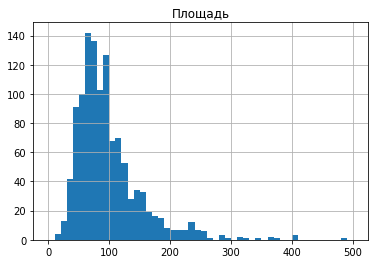

count    1165.000000
mean       97.371365
std        55.659083
min        12.000000
25%        62.000000
50%        84.100000
75%       115.200000
max       517.000000
Name: total_area, dtype: float64

In [43]:
# Площадь
data_center['total_area'].hist(bins=50, range = ( 0, 500))
plt.title('Площадь')
plt.show()
display(data_center['total_area'].describe())

Средний размер площади квартир в центре вырос по сравнению с общими казателями по региону с 52 кв.м. до 84 кв.м.

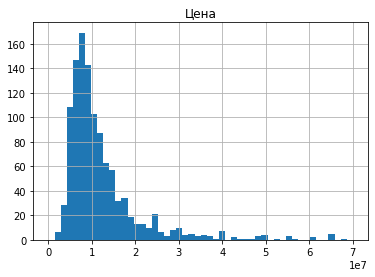

count    1.165000e+03
mean     1.600476e+07
std      3.284043e+07
min      2.100000e+06
25%      7.000000e+06
50%      9.500000e+06
75%      1.449000e+07
max      7.630000e+08
Name: last_price, dtype: float64

In [124]:
# Цена
data_center['last_price'].hist(bins=50, range = (0, 70000000))
plt.title('Цена')
plt.show()
display(data_center['last_price'].describe())

Средняя цена также выросла с 4650 тыс. до 9500 тыс.

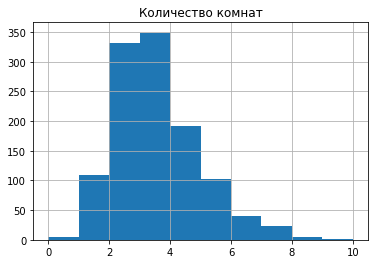

3.103862660944206

In [45]:
# Комнаты
data_center['rooms'].hist(bins=10, range = ( 0, 10))
plt.title('Количество комнат')
plt.show()
display(data_center['rooms'].mean())

Выросло и количество комнат с 2 до 3

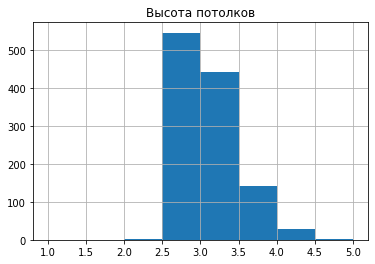

3.071081545064377

In [46]:
# Высота потолков
data_center['ceiling_height'].hist(bins=8, range = (1, 5))
plt.title('Высота потолков')
plt.show()
display(data_center['ceiling_height'].mean())

Средняя высота потолков выросла с 2,6 до 3 м.

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

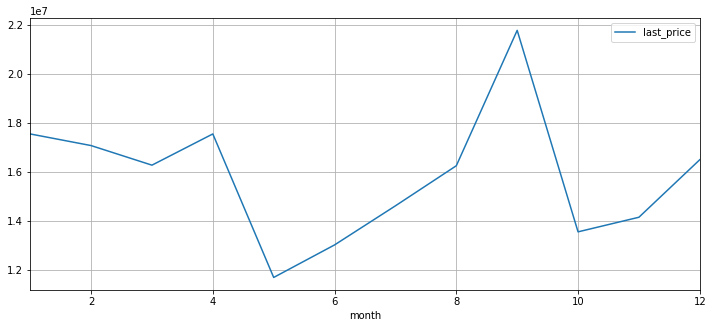

In [47]:
# Зависимость цены от даты размещения объявления
(
    data_center
    .pivot_table(index='month', values='last_price')
    .plot(grid=True, figsize=(12, 5))
)

Здесь видим аналогичное падение предложений летом, которое начинается чуть раньше, в мае. Также чуть меньшее падение видно в октябре.

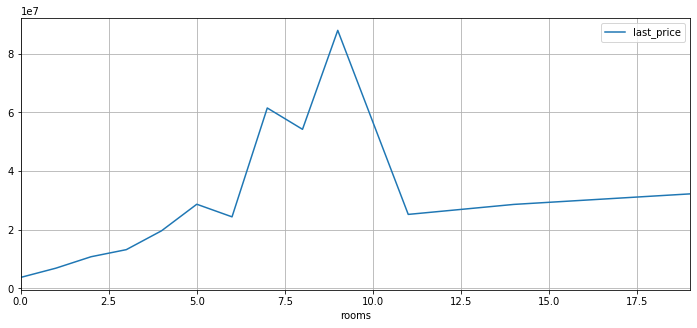

In [48]:
# Зависимость цены от количества комнат
(
    data_center
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True, figsize=(12, 5))
)

Цена резко возрастает в квартирах от 6 комнат. Обычно это элитное жилье, у которого соответствующая цена.

-0.09404269320790165

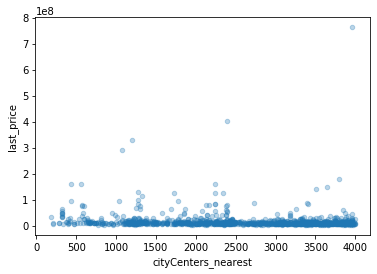

In [49]:
data_center.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3) 
display(data_center['cityCenters_nearest'].corr(data_center['last_price']))

В рассматриваемом сегменте расстояние до центра уже не оказывает значимого влияния, это видно из графка и коэффициэнта корреляции.

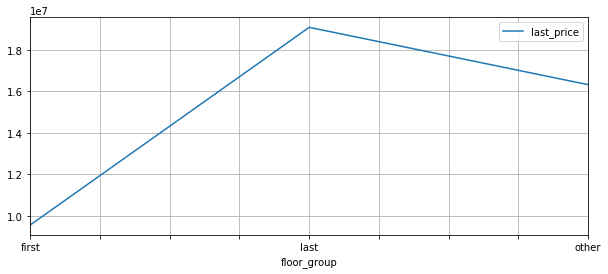

In [50]:
# Зависимость цены от этажа
(
    data_center
    .pivot_table(index='floor_group', values='last_price')
    .plot(grid=True, figsize=(10, 4))
)

В этом сегменте также не типична зависимость цены от этажности: из графика вилно, что чем выше этаж, тем выше цена. Это обусловлено видовыми характеристиками в центре Санкт-Петербурга - чем они лучше - тем выше цена. Первые этажи по-прежнему не в почете.

## Общий вывод

Нами установлены следующие средние показатели предложений по продаже квартир в рассматриваемой таблице:
- площадь: 52.0
- цена: 4650000.0
- количество комнат: 2.0
- высота потолков: 2.65
- продажа квартиры занимает в среднем 95 дней. Вместе с тем, время продажи зависит от количества комнат и стоимости жилья. Наиболее быстро продаются комнаты (0-комнатные квартиры в таблице). Элитное жилье (5 комнат и больше) продается от 200 дней и до нескольких лет, но такого жилья продается единицы и для этого правила есть исключения.
Можно считать, что продажи прошли очень быстро, если квартира продалась за неделю. Необычно долго продаются квартиры от 1 года до нескольких лет.

Из анализа данных видим следующие особенности:

- стоимость жилья более 12000000 является редкой,
- площадь жилья более 110 кв. м. также встречается очень редко,
- не типичными являются квартиры с количеством комнат более 6,
- высота потолков менее 2,4 и более 2,9 является редкостью.

Мы исключили 4153 строки с данными редкими значениями.

Из отфильтрованных данных видно:

- цена напрямую зависит от площади и количества комнат. А с увеличением расстояния от центра, напротив, цена падает, то есть зависимость этих показателей обратная.

- первый и последний этаж считаются менее ликвидными.

- на времени размещения объявлений сказывается сезонность продаж недвижимости - активность продаж падает летом в период отрусков. Уменьшение количества объявлений также видо в выходные, что обусловлено тем, что в выходные большинство риелторских агенств не работает. Что касается распределения предложений по годам, то из графика видно падения их количества после кризиса конца 2014 - начала 2015, связанного с введением санкций в отношении России, падения курса рубля и, как следствие, снижением деловой активности. Количество предложений стало восстанавливаться лишь в 2018-2019 с восстановлением экономики.

- мы выделили 10 населённых пунктов с наибольшим числом объявлений и указали среднюю стоимость жилья в каждом их них. Выделили населённые пункты с самой высокой и низкой стоимостью жилья.


Выделив квартиры в Санкт-Петербурге, мы определили центральную зону в радиусе 3 км. 
Полученные данные отличаются от общих:
- Средний размер площади квартир в центре вырос по сравнению с общими казателями по региону с 52 кв.м. до 84 кв.м.
- Средняя цена также выросла с 4650 тыс. до 9500 тыс.
- Выросло и количество комнат с 2 до 3
- Средняя высота потолков выросла с 2,6 до 3 м.

Также для данных объявлений в центре Санкт-Петербурга изменились некоторые факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления):
- видим аналогичное падение предложений летом, которое начинается чуть раньше, в мае. Также чуть меньшее падение видно в октябре, которого небыло в общих данных.
- цена резко возрастает в квартирах от 6 комнат. Обычно это элитное жилье, у которого соответствующая цена.
- в рассматриваемом сегменте расстояние до центра уже не оказывает значимого влияния, это видно из графка и коэффициэнта корреляции.
- в этом сегменте также не типична зависимость цены от этажности: из графика вилно, что чем выше этаж, тем выше цена. Это обусловлено видовыми характеристиками в центре Санкт-Петербурга - чем они лучше - тем выше цена. Первые этажи по-прежнему не в почете.

AxesSubplot(0.125,0.125;0.775x0.755)


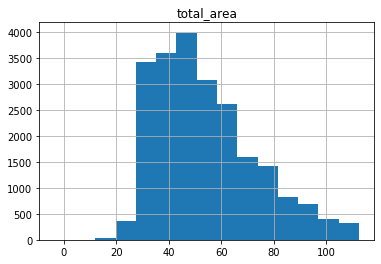

AxesSubplot(0.125,0.125;0.775x0.755)


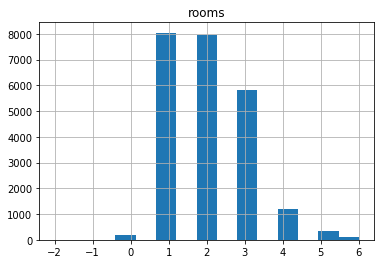

AxesSubplot(0.125,0.125;0.775x0.755)


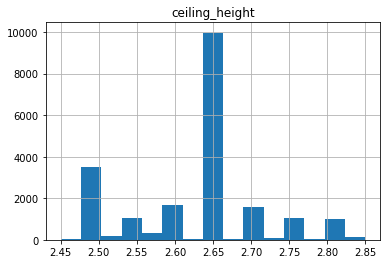

AxesSubplot(0.125,0.125;0.775x0.755)


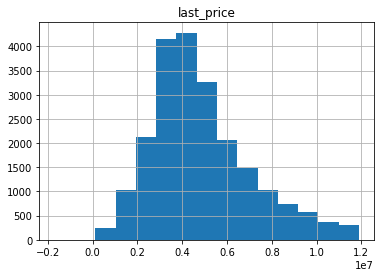

In [196]:
columns_hist = ['total_area', 'rooms', 'ceiling_height', 'last_price']

for i in columns_hist:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print(data[i].hist(bins=15, range = (fence_low, fence_high)))
    plt.title(i)
    plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


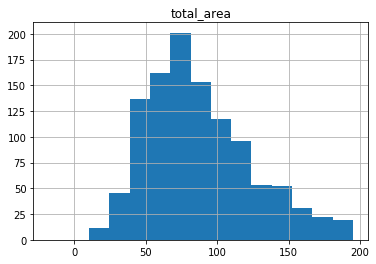

AxesSubplot(0.125,0.125;0.775x0.755)


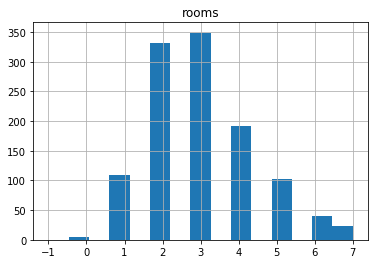

AxesSubplot(0.125,0.125;0.775x0.755)


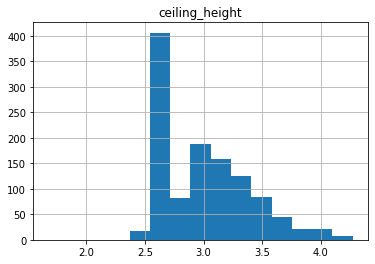

AxesSubplot(0.125,0.125;0.775x0.755)


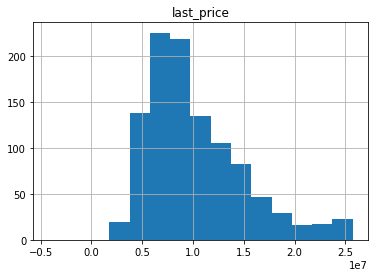

In [205]:
columns_hist = ['total_area', 'rooms', 'ceiling_height', 'last_price']

for i in columns_hist:
    q1 = data_center[i].quantile(0.25)
    q3 = data_center[i].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print(data_center[i].hist(bins=15, range = (fence_low, fence_high)))
    plt.title(i)
    plt.show()

In [ ]:
#Рассчитаем количество корзин для гистограмм. 
# Формула из википедии
bins_count = int(np.ceil(2*data_center.shape[0]**(1./3)))
bins_count

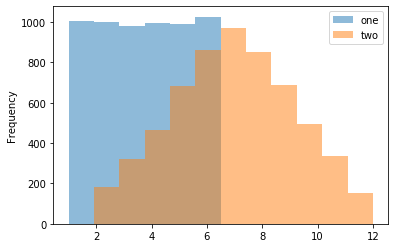

In [56]:
import numpy
df = pd.DataFrame(
    numpy.random.randint(1, 7, 6000),
    columns = ['one'])
df['two'] = df['one'] + numpy.random.randint(1, 7, 6000)
ax = df.plot.hist(bins=12, alpha=0.5)